In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import pandas as pd

In [65]:
df = pd.read_excel("SharkAttack_clean.xlsx")

## Fatality x Activity

In [66]:
df_no_unknown = df[(df["Fatal Y/N"] != "U") & (df["Activity"] != "unqualified")]

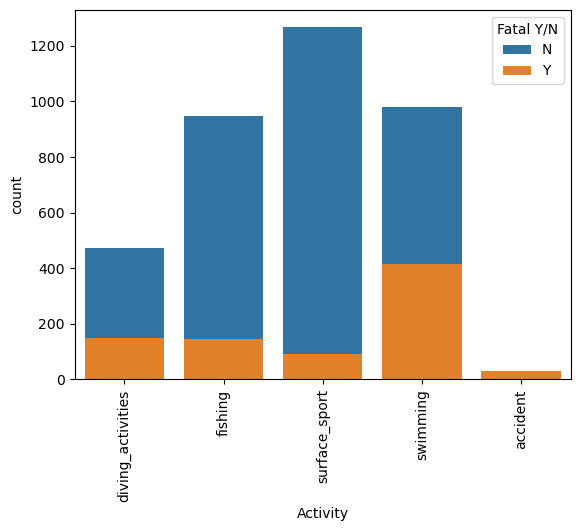

In [67]:
sns.countplot(df_no_unknown, x="Activity", hue="Fatal Y/N", dodge=False)
plt.xticks(rotation=90)
plt.show()

In [68]:
df_crosstab = pd.crosstab(df_no_unknown["Fatal Y/N"], df_no_unknown.Activity)

In [69]:
df_crosstab

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,9,473,947,1266,981
Y,29,149,147,90,415


In [70]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

(359.5905758335372, 1.4896549798408316e-76)

In [71]:
association(df_crosstab, method="cramer")

0.2824935634088099

In [72]:
df_crosstab_normalized = df_crosstab.apply(lambda x: x / x.sum(), axis=0)
round(df_crosstab_normalized * 100, 2)

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,23.68,76.05,86.56,93.36,70.27
Y,76.32,23.95,13.44,6.64,29.73


In [73]:
df_crosstab_normalized = round(df_crosstab_normalized.transpose()*100,2)

In [74]:
df_crosstab_normalized.sort_values(by="N")

Fatal Y/N,N,Y
Activity,,
accident,23.68,76.32
swimming,70.27,29.73
diving_activities,76.05,23.95
fishing,86.56,13.44
surface_sport,93.36,6.64


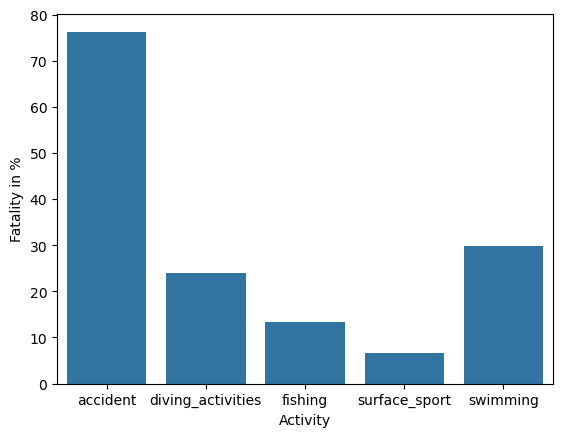

In [84]:
sns.barplot(df_crosstab_normalized, x="Activity",y="Y")
plt.ylabel("Fatality in %")
#plt.xticks(rotation=90)
plt.show()

## Attacks over time

In [86]:
df_grouped = df.groupby([df['Date'].dt.to_period('Y')]).size().unstack()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
sns

,Unnamed: 0,Date,Type,Region,Country,State,Location,Activity,Name,Sex,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,0,22-Feb-2025,Unprovoked,australia and oceania,australia,Queensland,The Wrecks walking track Moreton Island,diving_activities,Unknown Male,M,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22-Feb-2025,Questionable,australia and oceania,australia,NSW,Off Port Stephens near Newcastle,fishing,Paul Barning,M,...,Mako shark,Simon De Marchi: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,22-Feb-2025,Unprovoked,australia and oceania,australia,Western Australia,Blasck Wall Reach Swan River Perth,surface_sport,Georgina Smith,F,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10-Feb-2025,Unprovoked,caribbean,bahamas,NaN,Bimini Bay,swimming,Rileigh Decker,F,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10-Feb-2025,Unprovoked,caribbean,bahamas,NaN,Bimini Bay,swimming,Summer Layman,F,...,bull shark,Dail Mail Australia Todd Smith: Kevin McMurray...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
